In [1]:
library("tidyverse")
library("dplyr")
library("zoo")
library("pomp")
setwd("~/Desktop/School/research/pf_mobility")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘pomp’


The following object is masked from ‘package:zoo’:

    time<-


The following object is masked from ‘package:purrr’:

    map




In [262]:
source("scripts/read_data.R")
source("constants/file_loc.R")
source("constants/serial_interval.R")

source("functions/d_measure.R")
source("functions/r_process.R")
source("functions/priors.R")
source("functions/disc_gamma.R")
source("functions/run_pfilter.R")
source("functions/simulate_data.R")
source("functions/get_renewal.R")
source("functions/get_true_rt.R")
source("functions/pred_case.R")

In [468]:
nz <- read_who("New Zealand", smooth=TRUE, k = 7)

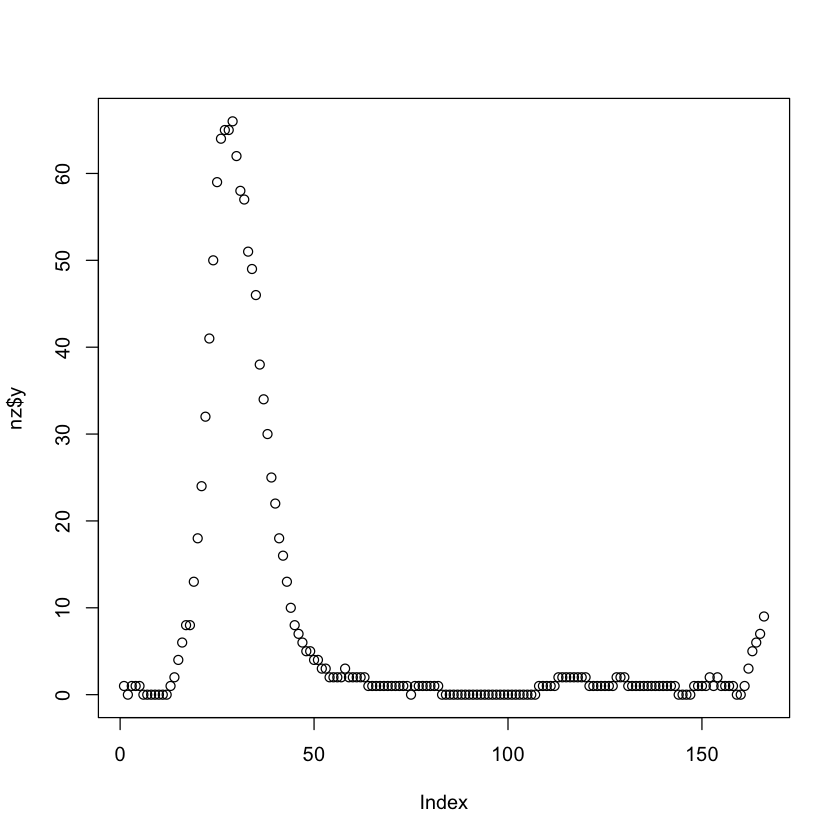

In [469]:
plot(nz$y)

In [470]:
nz_filter <- run_pfilter(rprocess_config = tran_normal_epifilter, dmeasure_config = meas_pois, data = nz,
                        Np=500, x_init = 1, shape = nz_shape, scale = nz_scale)

NOTE: The provided objects ‘T’,‘Y’ are available for use by POMP basic components.



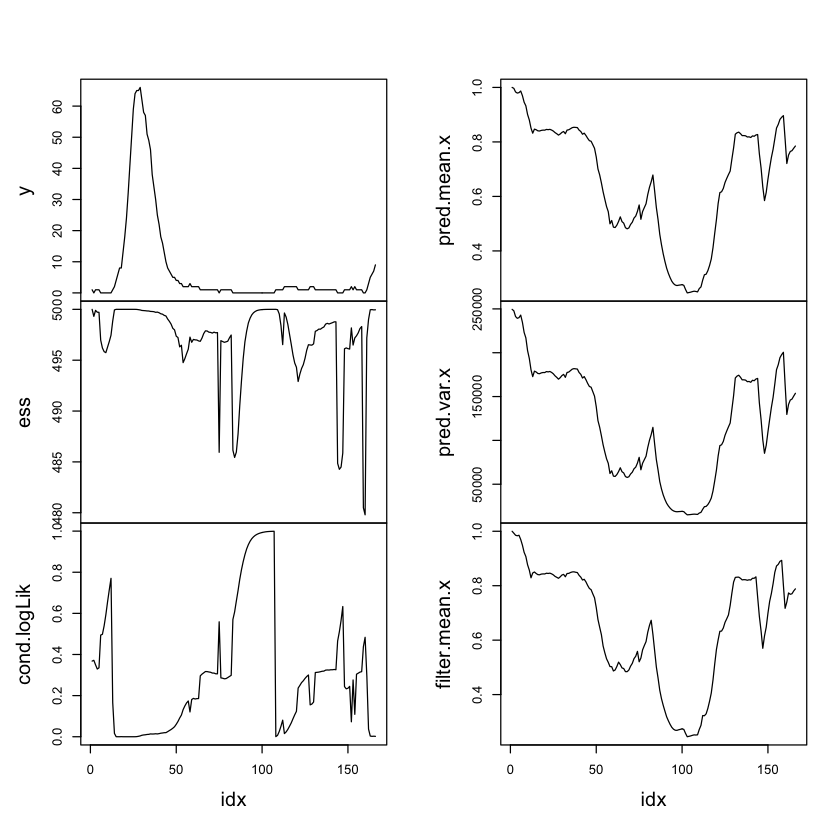

In [471]:
plot(nz_filter)

In [298]:
nz_result <- as.data.frame(nz_filter)
nz_pred_rt <- nz_result$pred.mean.x

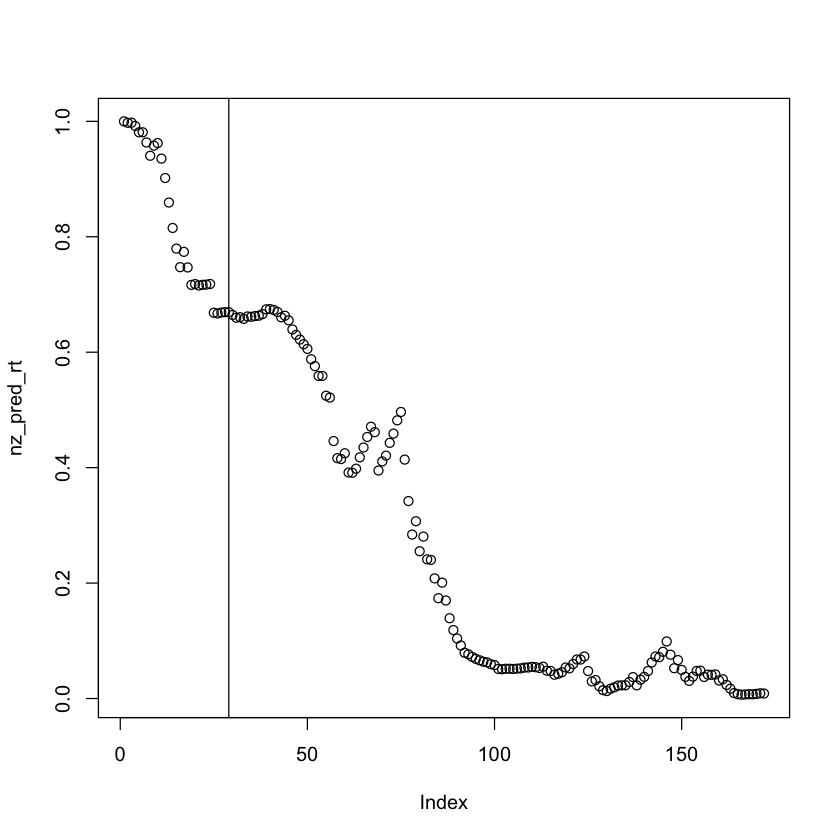

In [299]:
plot(nz_pred_rt)
abline(v=which.max(nz$y))

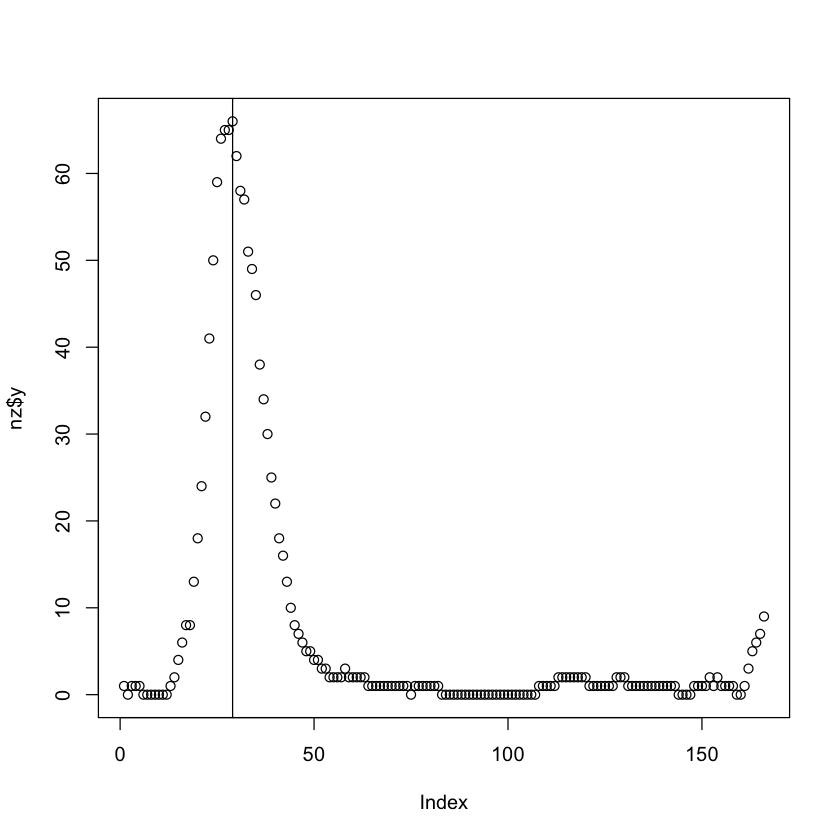

In [300]:
plot(nz$y)
abline(v=which.max(nz$y))

In [301]:
y_pred <- one_day_pred(rt = nz_pred_rt, y = nz$y, shape = nz_shape, scale = nz_scale )

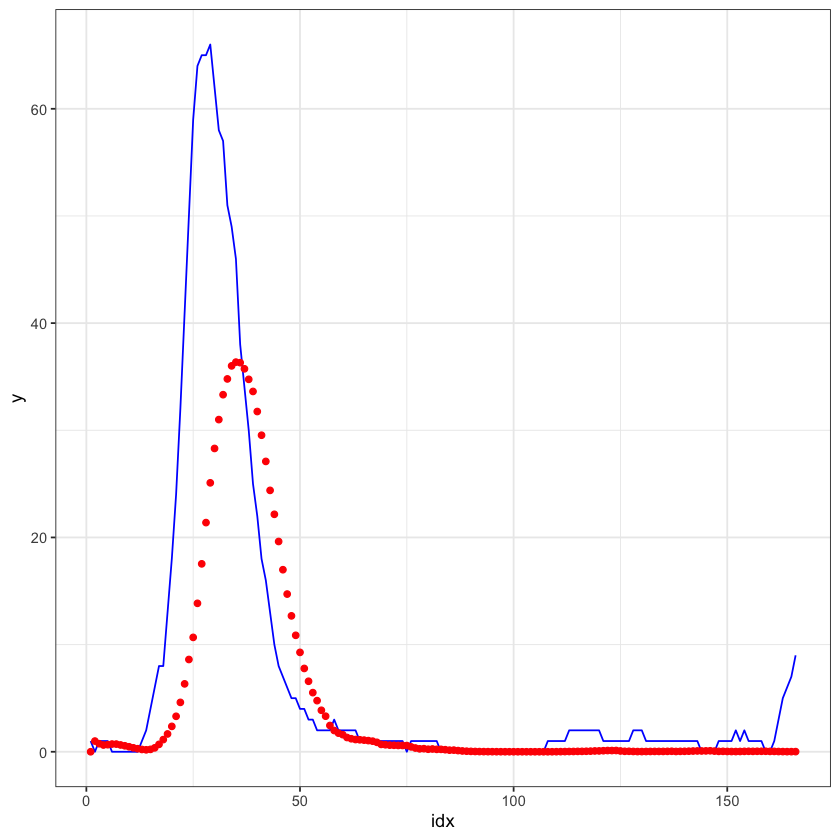

In [302]:
ggplot(data=data.frame(y=nz$y, y_pred = y_pred, idx = nz$idx), aes(x = idx, y=y ))+
geom_line(aes(y=y), color = "blue")+
geom_point(aes(y=y_pred), color = "red")+
theme_bw()

In [472]:
nz_myfilter <-run_pfilter(rprocess_config = tran_lognormal, dmeasure_config = meas_pois_lnorm, data = nz,
                        Np = 1000, sdlog=0.2, shape = nz_shape, scale = nz_scale, x_init= 1) 

NOTE: The provided objects ‘T’,‘Y’ are available for use by POMP basic components.



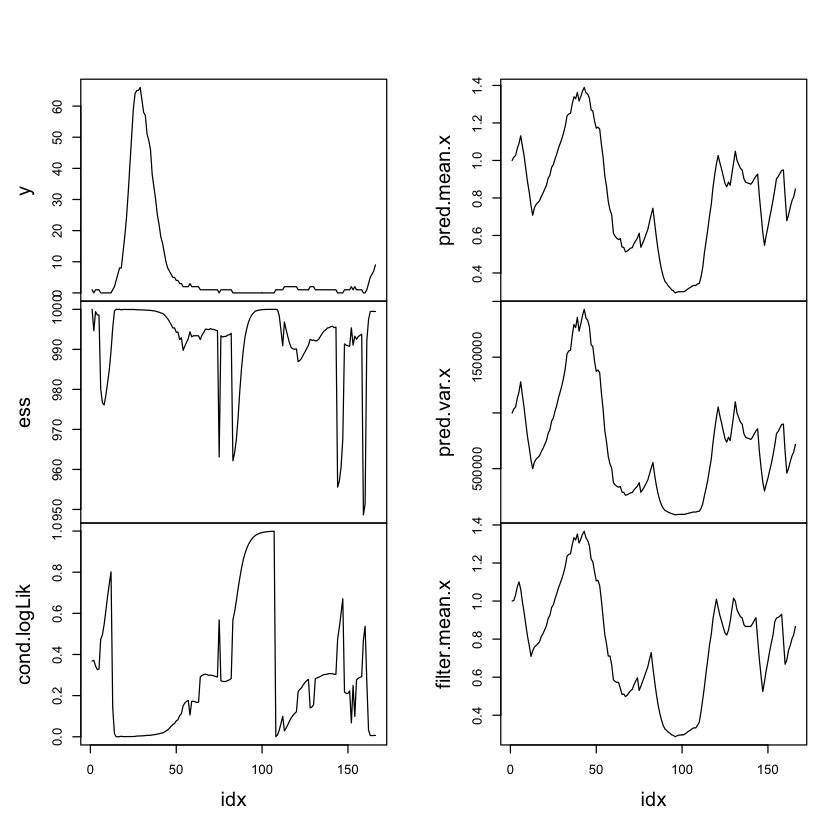

In [473]:
plot(nz_myfilter)

In [307]:
my_result <- as.data.frame(nz_myfilter)
my_pred_rt <- my_result$pred.mean.x

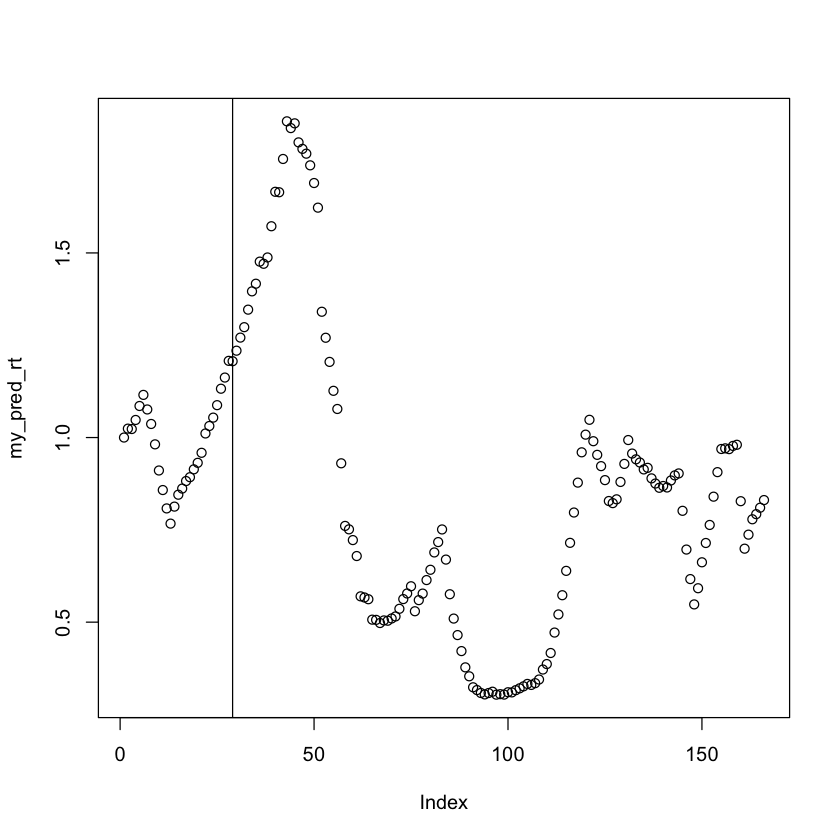

In [308]:
plot(my_pred_rt)
abline(v=which.max(nz$y))

In [309]:
ymy_pred <- one_day_pred(rt = my_pred_rt, y = nz$y, shape = nz_shape, scale = nz_scale )

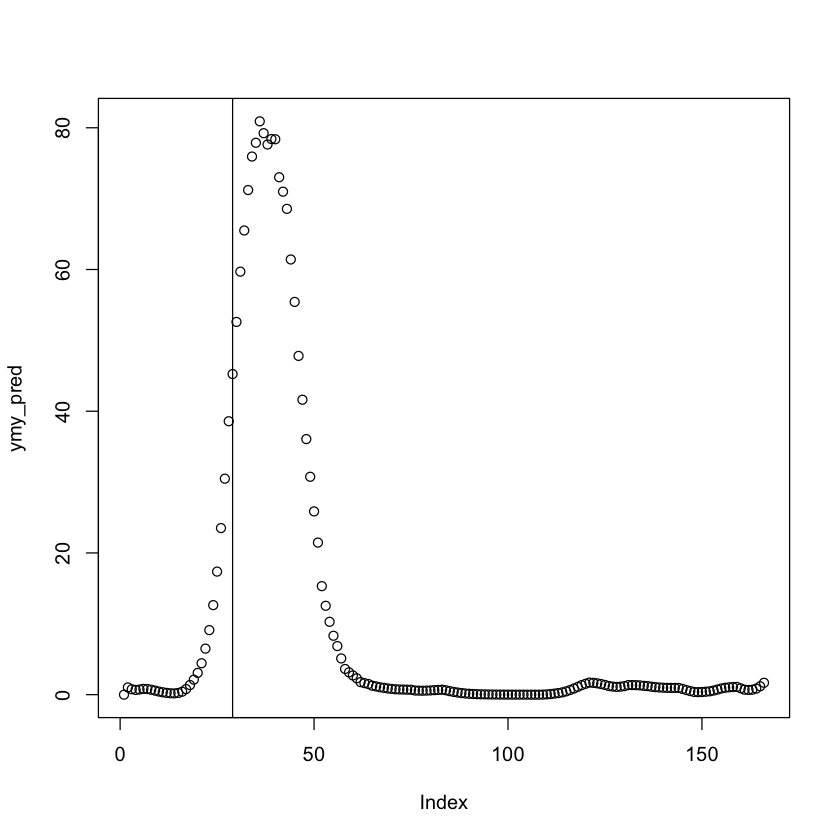

In [310]:
plot(ymy_pred)
abline(v=which.max(nz$y))

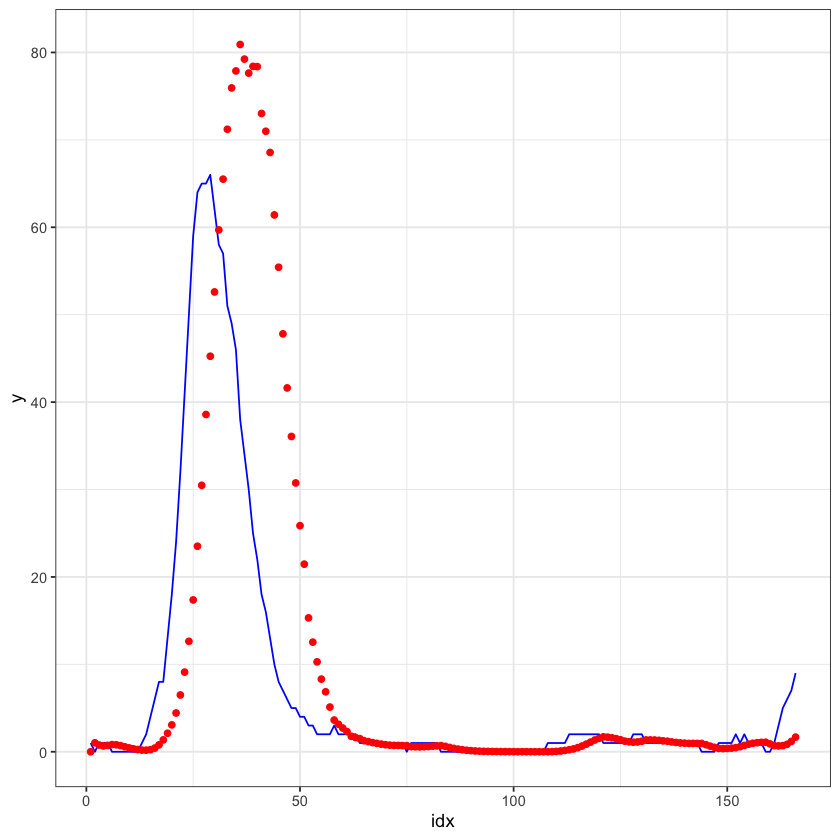

In [311]:
ggplot(data=data.frame(y=nz$y, y_pred = ymy_pred, idx = nz$idx), aes(x = idx, y=y ))+
geom_line(aes(y=y), color = "blue")+
geom_point(aes(y=y_pred), color = "red")+
theme_bw()

In [312]:
sqrt(sum(nz$y-ymy_pred)^2)

[1] 445.4574

In [313]:
sqrt(sum(nz$y-y_pred)^2)

[1] 491.2813

In [314]:
sqrt(sum(nz$y[2:length(nz$y)]-nz$y[1:length(nz$y)-1])^2)

[1] 8

# Full Canadian cases

In [582]:
ca <- read_owid_mob(covid_file_loc)

In [583]:
ca <- data.frame(idx = ca$idx, y = ca$y)

In [514]:
ca$y <- log(ca$y+1)

In [515]:
head(ca)

,idx,y
,<int>,<dbl>
1,1,0.6931472
2,2,0.0000000
3,3,0.0000000
4,4,0.0000000
5,5,0.0000000
6,6,0.0000000


In [564]:
ca_filter <-run_pfilter(rprocess_config = tran_lognormal, dmeasure_config = meas_pois_lnorm, data = ca,
                        Np = 1000, sdlog=0.1, shape = nz_shape, scale = nz_scale, x_init= 1) 

NOTE: The provided objects ‘T’,‘Y’ are available for use by POMP basic components.



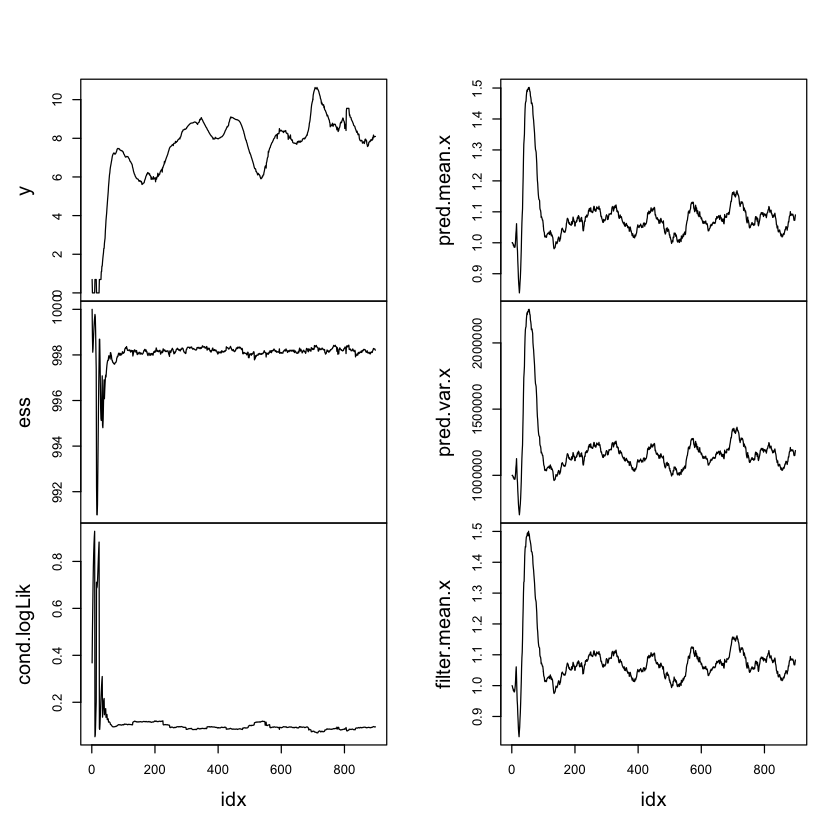

In [565]:
plot(ca_filter)

In [566]:
ca_result <- as.data.frame(ca_filter)
ca_pred_rt <- ca_result$pred.mean.x

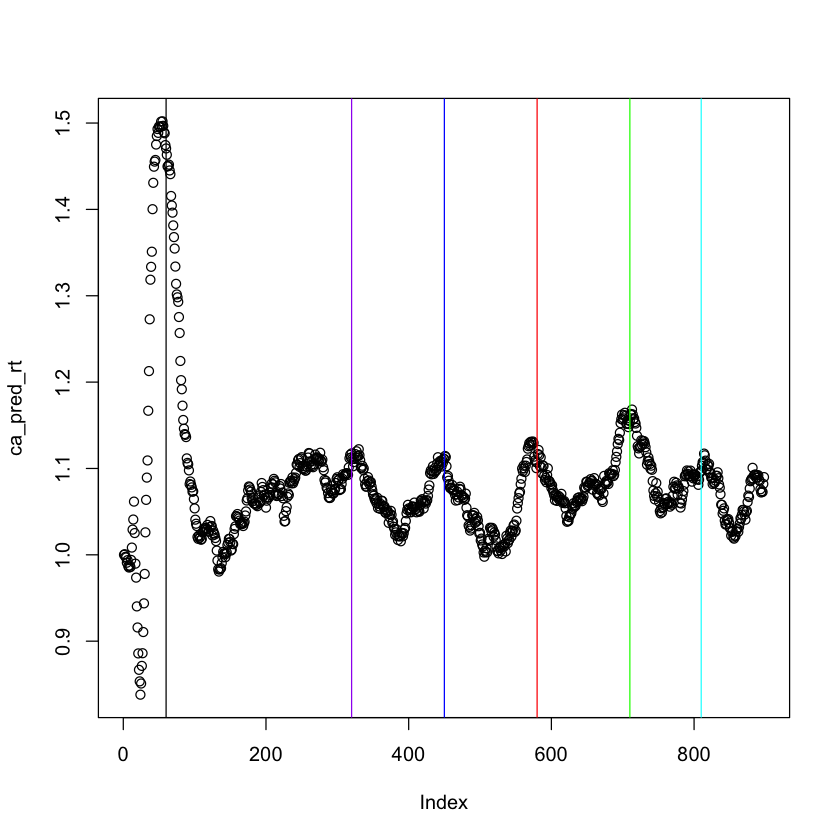

In [591]:
plot(ca_pred_rt)
abline(v=c(60, 320, 450,580, 710, 810), col = c("black","purple","blue", "red", "green", "cyan"))

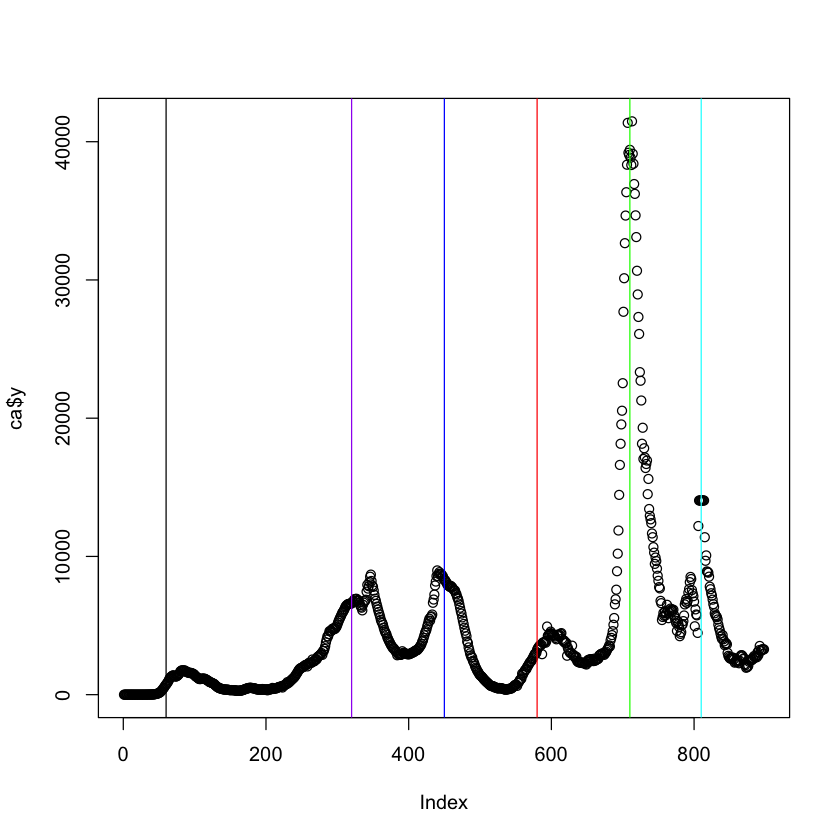

In [592]:
plot(ca$y)
abline(v=c(60, 320, 450,580, 710, 810), col = c("black","purple","blue", "red", "green", "cyan"))

In [568]:
ca_pred<- one_day_pred(rt = ca_pred_rt, y = ca$y, shape = nz_shape, scale = nz_scale )

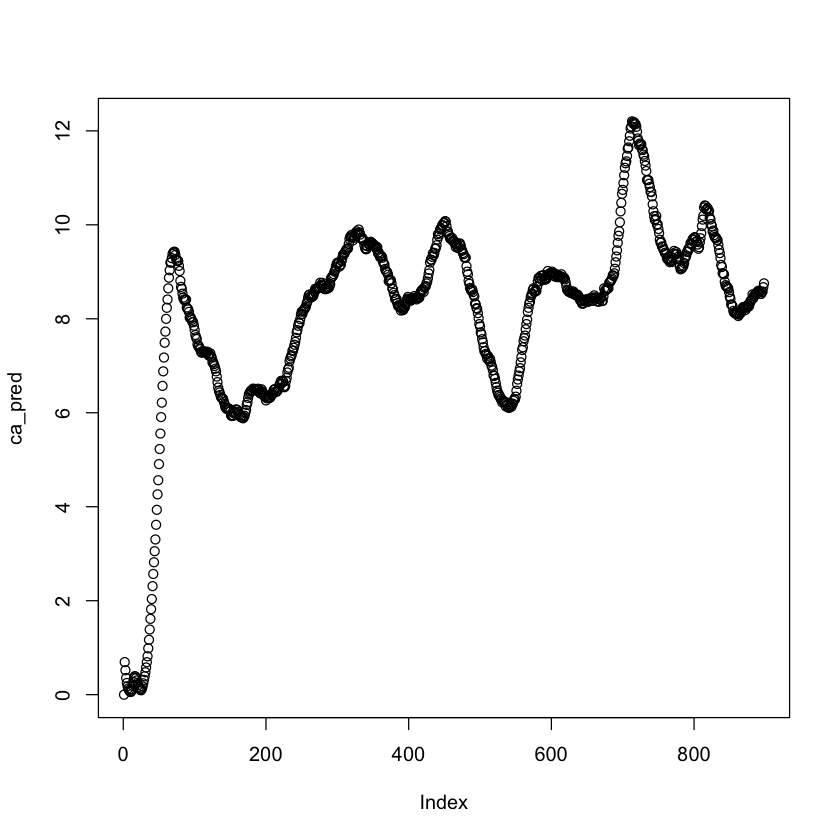

In [569]:
plot(ca_pred)

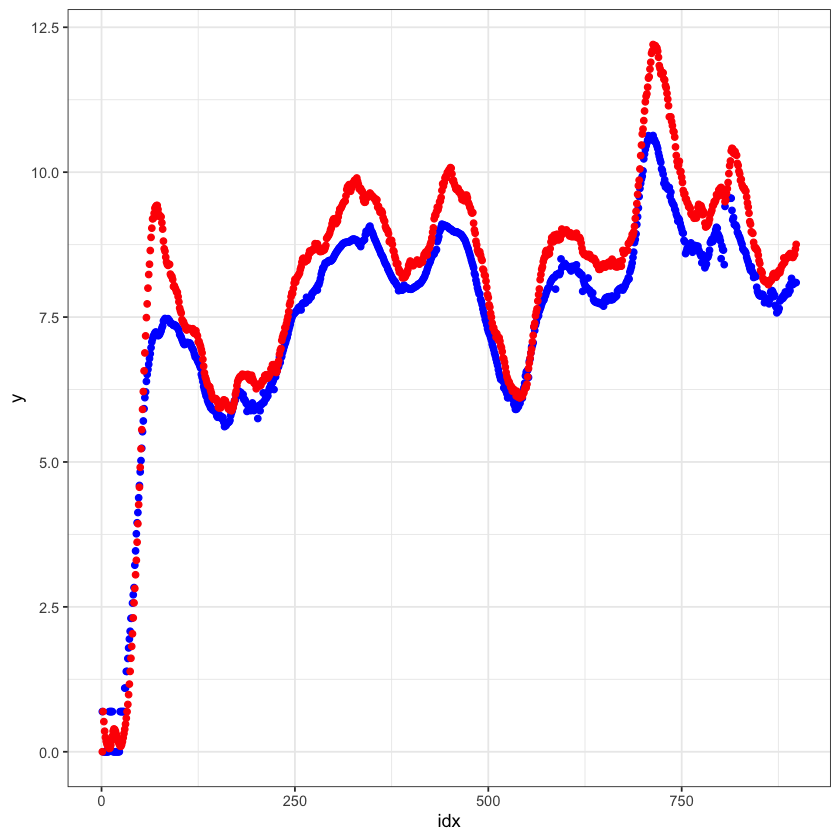

In [570]:
ggplot(data=data.frame(y=ca$y, y_pred = ca_pred, idx = ca$idx), aes(x = idx, y=y))+
geom_point(aes(y=y), color = "blue")+
geom_point(aes(y=ca_pred), color = "red")+
theme_bw()

In [571]:
sqrt((sum(ca$y-ca_pred))^2/length(ca_pred))

[1] 17.02769